In [1]:
import pandas as pd
import numpy as np
import glob
# import dash

In [2]:
# glob.glob("*")
var_list=[""]
data=pd.read_excel("GOA_COMPLETE_results_SCIP.xlsx",sheet_name=None)

In [7]:
data.keys()

dict_keys(['Cost', 'AccumulatedNewCapacity', 'AnnEmissions', 'AnnFixedOperatingCost', 'AnnTechEmissionByMode', 'AnnTechEmission', 'AnnVariableOperatingCost', 'CapitalInvestment', 'Demand', 'DiscCapitalInvestment', 'DiscOperatingCost', 'DiscSalvageValue', 'ModelPeriodCostByRegion', 'ModelPeriodEmissions', 'NewCapacity', 'OperatingCost', 'ProdAnn', 'ProdByTech', 'Prod', 'RateOfActivity', 'RateOfDemand', 'RateOfProdByTechByMode', 'RateOfProdByTech', 'RateOfProd', 'RateOfTotActivity', 'RateOfUseByTechByMode', 'RateOfUseByTech', 'SalvageValue', 'TotAnnTechActivityByMode', 'TotCapacityAnn', 'TotDiscCostByTech', 'TotDiscCost', 'TotTechAnnActivity', 'TotTechModelPeriodActivity', 'Use'])

In [16]:
ACT=data['RateOfActivity'].pivot(["TECHNOLOGY","TIMESLICE","MODE_OF_OPERATION"],"YEAR","VALUE").reset_index()

In [307]:
tecs=pd.read_excel('GOA_Techs_names.xlsx')
tecs.drop(columns="sector_fuel",inplace=True)
sectors=['Agriculture', 'Commercial', 'Cooking urban', 'Cooking rural',
         'Fisheries', 'Industry', 'Residential', 'PTR', 'FTR','PWR',"TRAN"]

In [34]:
ACT=ACT.groupby(["TECHNOLOGY","MODE_OF_OPERATION"]).sum().drop(columns="TIMESLICE").reset_index()

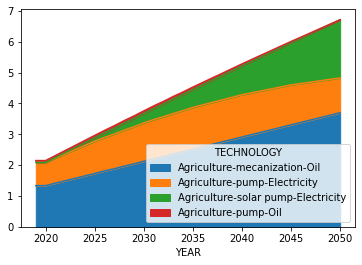

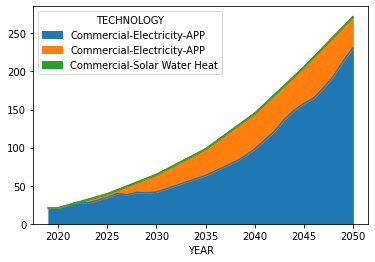

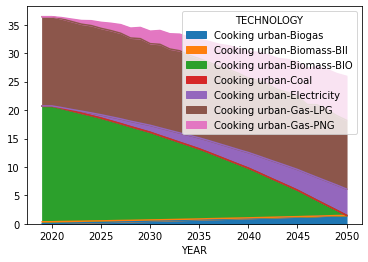

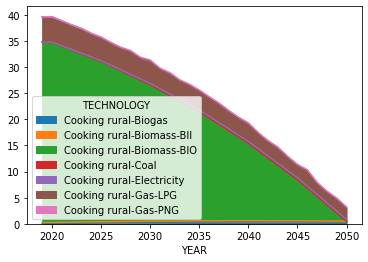

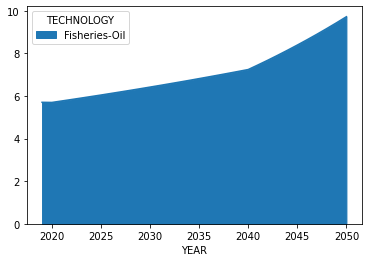

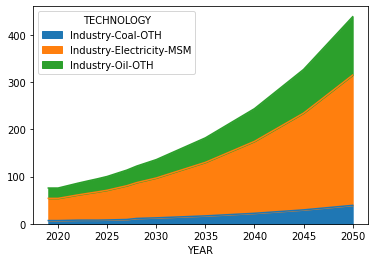

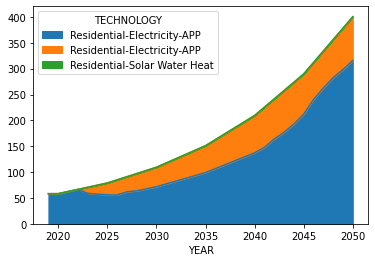

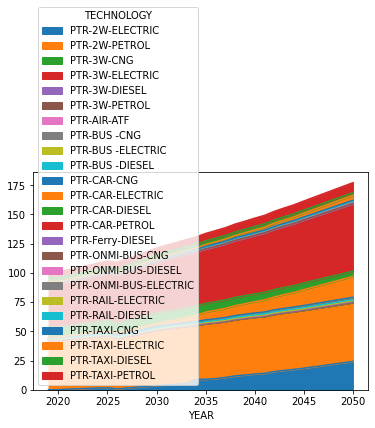

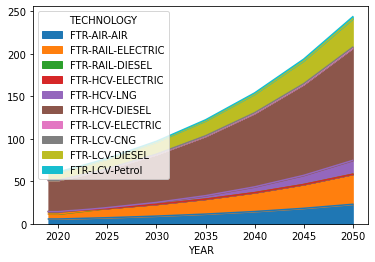

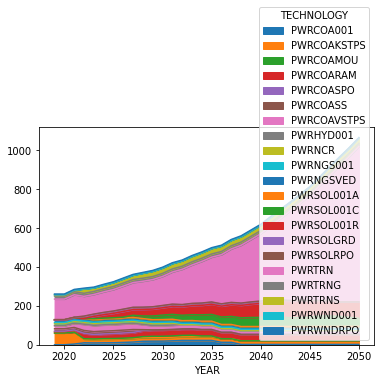

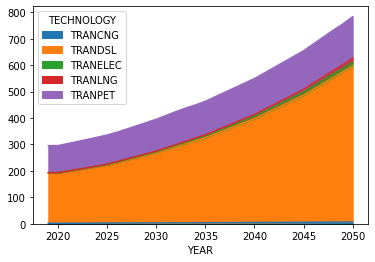

In [352]:
#native plot
for i in sectors:
    tec_names=dict(tecs[tecs.sector_fuel_rename.str.contains(i)].values)
    if not tec_names=={}:
        ACT[ACT.TECHNOLOGY.isin(tec_names.keys())].drop(columns="MODE_OF_OPERATION").set_index("TECHNOLOGY").rename(index=tec_names).T.plot(kind="area",stacked=True)
    else:
        ACT[ACT.TECHNOLOGY.str.contains(i)].drop(columns="MODE_OF_OPERATION").set_index("TECHNOLOGY").rename(index=tec_names).T.plot(kind="area",stacked=True)

In [139]:
# import dash
# import dash_bootstrap_components as dbc
# import numpy as np
# import plotly.graph_objects as go
# from dash import Input, Output, dcc, html
# import chart_studio.plotly as py
# import plotly.io as pio
# import plotly
# pio.renderers.default = 'iframe'

In [165]:
import plotly.express as px
fig = px.bar(t, x="YEAR", y=t.columns, title="Long-Form Input")
fig.show()

In [308]:
pl_data_list=[]
for i in sectors:
    tec_names=dict(tecs[tecs.sector_fuel_rename.str.contains(i)].values)
    if not tec_names=={}:
        pl_data=ACT[ACT.TECHNOLOGY.isin(tec_names.keys())].replace(tec_names)
        pl_data["TECHNOLOGY"]=pl_data["TECHNOLOGY"]+pl_data["MODE_OF_OPERATION"].replace({1:"",2:" Offgrid"})
        pl_data=pl_data.drop(columns="MODE_OF_OPERATION").set_index("TECHNOLOGY").T.reset_index()
        pl_data_list.append((i,pl_data))
    else:
        pl_data=ACT[ACT.TECHNOLOGY.str.contains(i)].replace(tec_names)
        pl_data["TECHNOLOGY"]=pl_data["TECHNOLOGY"]+pl_data["MODE_OF_OPERATION"].replace({1:"",2:" Offgrid"})
        pl_data=pl_data.drop(columns="MODE_OF_OPERATION").set_index("TECHNOLOGY").T.reset_index()
        pl_data_list.append((i,pl_data))

# t=ACT[ACT.TECHNOLOGY.str.contains("PWR")].drop(columns="MODE_OF_OPERATION").set_index("TECHNOLOGY").T.reset_index()

In [341]:
jlist=[]
for i in pl_data_list:
    fig=px.bar(i[1], x="YEAR", y=i[1].columns, title=i[0])
    jlist.append(fig.to_json())

In [378]:
CAP=data['TotCapacityAnn']
CAP=CAP.groupby(["TECHNOLOGY","YEAR"]).sum().reset_index()[["TECHNOLOGY","YEAR","VALUE"]].pivot("TECHNOLOGY","YEAR","VALUE").reset_index()

In [372]:
cap_sector=["PWR"]
# CAP=data['TotCapacityAnn']
# CAP.MODE_OF_OPERATION.unique()

In [382]:
pl_data_list=[]
for i in cap_sector:
    pl_data=CAP[CAP.TECHNOLOGY.str.contains(i)].replace(tec_names)
    pl_data=pl_data.set_index("TECHNOLOGY").T.reset_index().fillna(0)
    pl_data_list.append((i,pl_data))


In [384]:
px.bar(pl_data_list[1], x="YEAR", y=pl_data_list[1].columns, title=pl_data_list[0])

IndexError: list index out of range